In [1]:
import snappy
from snappy import ProductIO
import datetime
import sys
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from netCDF4 import Dataset
from scipy import signal
import cv2
import calibrate
import direction
%matplotlib inline

In [2]:
label = pd.read_csv('./sar_ndbc_ecmwf_dataset_subset_2000.csv')
data = Dataset('/Volumes/Yangchao/subset_2000/subset_'+label.sar[5]+'.dim')
sigma_vv = data.variables['Sigma0_VV'][:]

(-0.5, 1999.5, 1999.5, -0.5)

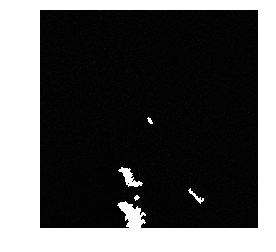

In [5]:
plt.imshow(sigma_vv,'gray')
plt.axis('off')

In [6]:
x = sigma_vv[:400,:400]

(-0.5, 399.5, 399.5, -0.5)

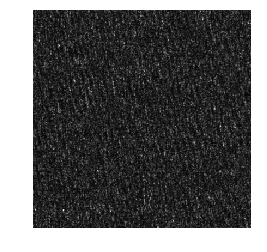

In [7]:
plt.imshow(x,'gray')
plt.axis('off')

In [8]:
xf = np.fft.fft2(x)

In [9]:
xfs = np.fft.fftshift(xf)

In [10]:
xfs[195:205,195:205]=0

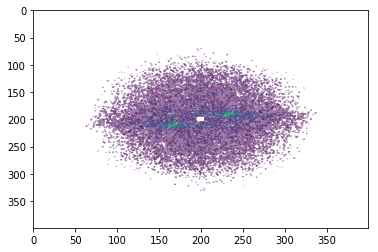

In [11]:
fig = plt.figure()
fig.gca().invert_yaxis()
ct = plt.contour(np.abs(xfs),alpha=0.5)

Text(50,300,'i love you ')

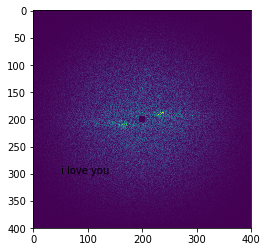

In [12]:

plt.imshow(np.abs(xfs))
plt.text(50, 300, 'i love you ')


(-0.5, 9.5, 9.5, -0.5)

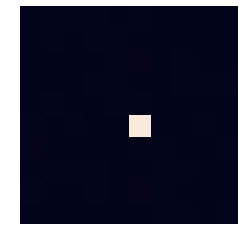

In [38]:
plt.imshow(np.abs(xfs)[195:205,195:205])
plt.axis('off')

In [20]:
ct.

In [30]:
xfs = np.abs(xfs)

In [31]:
xfs.shape

(400, 400)

In [43]:
np.argmax(xfs[:,:200])

41571

In [50]:
41571/200

207.855

In [51]:
41571%200

171

In [60]:
xfs[:,:200][207, 171]

282.5926791024512

In [39]:
xfs[193, 229]

282.5926791024512

In [41]:
xf[0,0]=0

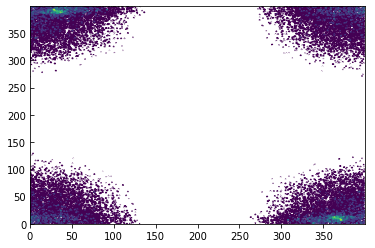

In [42]:
plt.contour(np.abs(xf))

In [13]:

t = np.arctan(-7/29)*180/np.pi

In [14]:
t

-13.570434385161487

-13.570434385161487
-19.44003482817619
-17.354024636261325
-0.0
-0.0
-5.31454566994475
-4.513988458001262
-17.241459398939977
-17.81888891452278
-0.0
-5.31454566994475
-5.440332031005506
-6.009005957494525
-5.31454566994475
-0.0
-6.78897457443879
-6.203447901691836
-10.619655276155134
-6.009005957494525
-8.74616226255521
45.0
45.0
-11.309932474020213
90
90


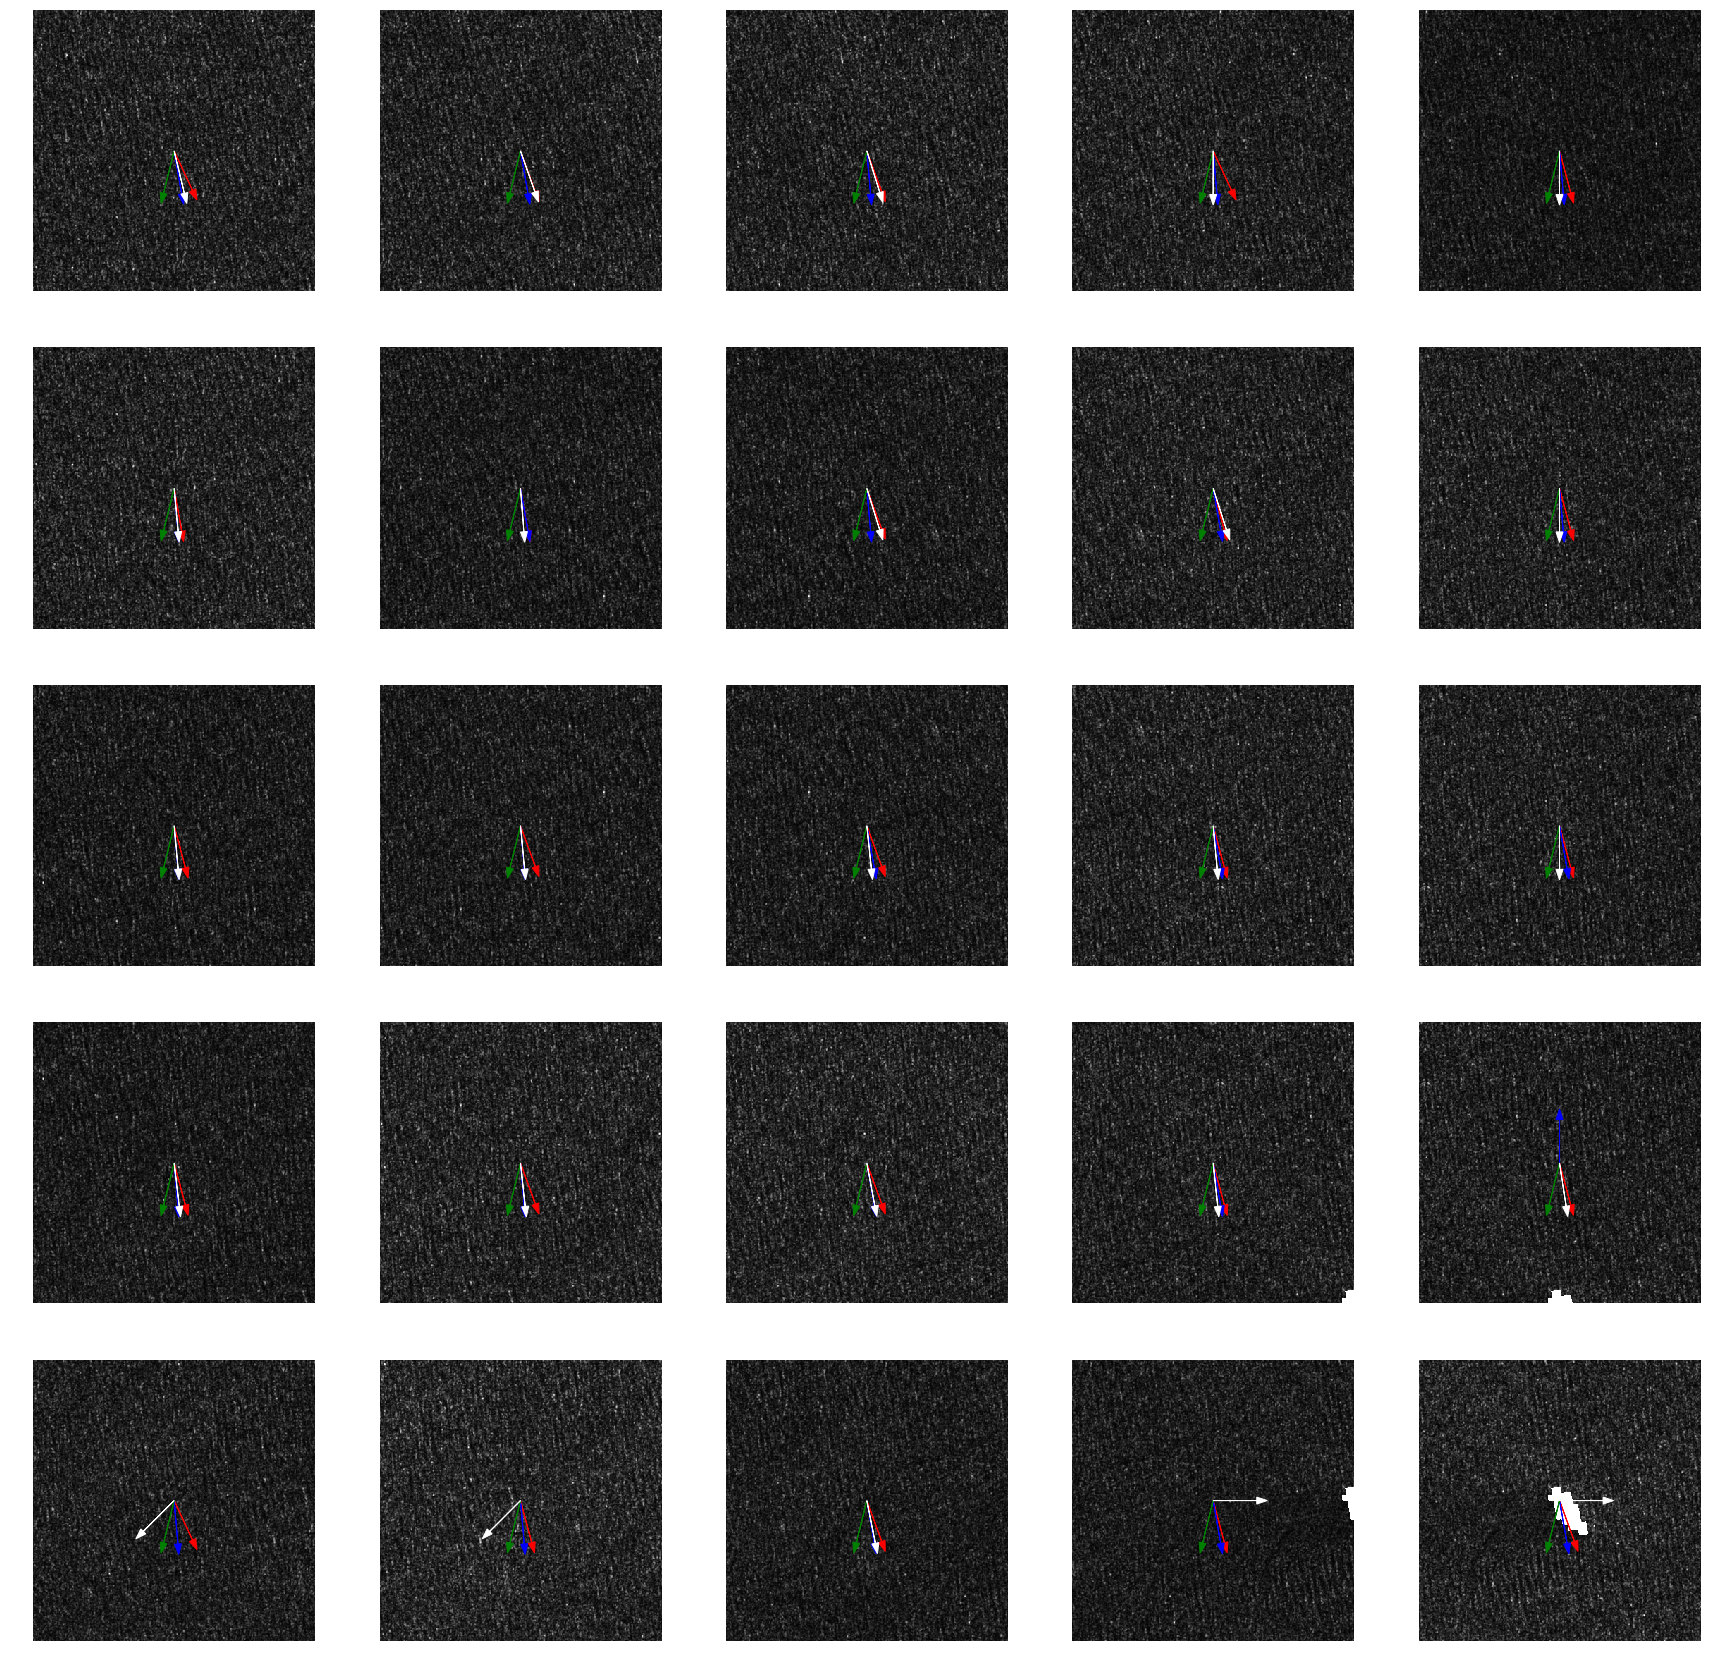

In [4]:
plt.figure(figsize=(30,30))
wspeed = label.ndbc_wspeed[5]
wdir = label.ndbc_wdir[5]
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,j+i*5+1)
        plt.imshow(sigma_vv[i*200:i*200+400,j*200:j*200+400],'gray')
        direc = direction.main_lg(sigma_vv[i*200:i*200+400,j*200:j*200+400],mode='sobel')
        direc_i = direction.main_lg(sigma_vv[i*200:i*200+400,j*200:j*200+400],mode='igl')
        t = direction.FFT2(sigma_vv[i*200:i*200+400,j*200:j*200+400])
        print(t)
        plt.arrow(200,200,np.cos((direc[-1]-90)/180*np.pi)*wspeed*5,np.sin((direc[-1]-90)/180*np.pi)*wspeed*5,color='red',head_width=10)
        plt.arrow(200,200,np.cos((direc_i[-1]-90)/180*np.pi)*wspeed*5,np.sin((direc_i[-1]-90)/180*np.pi)*wspeed*5,color='blue',head_width=10)
        plt.arrow(200,200,np.cos((10-wdir)%180/180*np.pi)*wspeed*5,np.sin((10-wdir)%180/180*np.pi)*wspeed*5,color='green',head_width=10)
        plt.arrow(200,200, np.cos((t-90)%180/180*np.pi)*wspeed*5,np.sin((t-90)%180/180*np.pi)*wspeed*5,color='white',head_width=10)
        plt.axis('off')

In [16]:
sigma_vv[(200,200)]

0.07204058

In [6]:
s = sigma_vv.shape

In [9]:
sigma_vv[s[0]/2, s[1]/2]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [10]:
sigma_vv[0, 0]

0.15310606

In [11]:
s[0]/2

1000.0

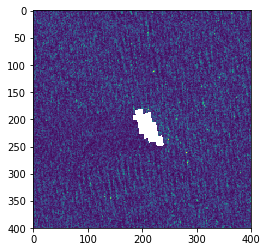

In [6]:
plt.imshow(sigma_vv[800:1200, 800:1200])

In [7]:
s = sigma_vv[800:1200, 800:1200]

In [11]:
np.argmax(s)

145519

In [12]:
145519/400

363.7975

In [13]:
145519%400

319

In [14]:
sf = np.fft.fft2(s)

In [15]:
sfi = np.fft.fftshift(sf)

In [21]:
sfi[196:205,196:205]=0

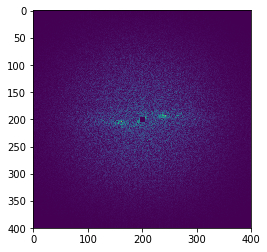

In [22]:
plt.imshow(np.abs(sfi))

In [23]:
np.argmax(np.abs(sfi))

82563

In [25]:
82563%400

163